# Неделя 1. Четверг
## Проверка статистических гипотез

In [2]:
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

### Задание № 1. Гипотеза о доле

Реализовать функцию, позволяющую проверять гипотезу о доле. На вход функция принимает два значения для долей, объем выборки и уровень значимости. 

In [3]:
def proportion_test(p_hat, p_0, n, alpha):
    """
    Функция для проверки гипотезы о доле.

    Parameters:
    -----------
    p_hat : float
        Наблюдаемая доля в выборке.
    p_0 : float
        Гипотетическая доля (нулевая гипотеза).
    n : int
        Объем выборки.
    alpha : float
        Уровень значимости.

    Returns:
    --------
    z_stat : float
        Значение Z-статистики.
    p_value : float
        p-value для проверки гипотезы.
    """

    # Вычисление Z-статистики
    se = np.sqrt(p_0 * (1 - p_0) / n)
    z_stat = (p_hat - p_0) / se

    # Вычисление p-value (двусторонний тест)
    p_value = 2 * (1 - st.norm.cdf(abs(z_stat)))

    # Вывод результата
    print(f"Z-статистика: {z_stat:.4f}")
    print(f"p-value: {p_value:.4f}")

    if p_value < alpha:
        print(f"На уровне значимости {alpha} отвергаем нулевую гипотезу.")
    else:
        print(f"На уровне значимости {alpha} не отвергаем нулевую гипотезу.")

    return z_stat, p_value

In [4]:
print("Проверка 1: Честная ли монетка (57 орлов из 100 подбрасываний)\n")
p_hat = 0.57  # Наблюдаемая доля
p0 = 0.5       # Гипотетическая доля (для честной монеты)
n = 100         # Количество подбрасываний
alpha = 0.05    # Уровень значимости
z_stat, p_value = proportion_test(p_hat, p0, n, alpha)

Проверка 1: Честная ли монетка (57 орлов из 100 подбрасываний)

Z-статистика: 1.4000
p-value: 0.1615
На уровне значимости 0.05 не отвергаем нулевую гипотезу.


In [5]:
print("Задача 2: Эффективность рекламы\n")
z2, p2 = proportion_test(p_hat=0.3, p_0=0.2, n=200, alpha=0.05)

Задача 2: Эффективность рекламы

Z-статистика: 3.5355
p-value: 0.0004
На уровне значимости 0.05 отвергаем нулевую гипотезу.


- Проверьте:  
    - можно ли считать монетку честной, если после 100 подбрасываний, выпало 57 орлов  
    - Стала ли статистически значимо эффективнее реклама, если ранее конверсия была 0.2, а сейчас на выборке из 200 элементов конверсия вышла 0.3

### Задание № 2. Гипотеза о среднем
Реализовать функцию, позволяющую вычислять двухвыборочный t-тест. 
Функция должна принимать следующие аргументы: 
* `sample_1`, `sample_2` - два списка выборочными данными
* `alternative` принимает одно из трех значений: `twosided`, `left`, `right`. Аргумент позволяет контролировать вид проверяемой альтернативы. 
* `alpha` - уровень значимости
* `independent` - `True` или `False`

Функция должна распечатывать результат проверки аналогично примеру выше, а также возвращать значение статистики и `p_value`. 

In [6]:
def ttest(sample_1, sample_2, alternative='twosided', alpha=.05, independent=True):
    pass
    return t_stat, p_value

☑️ Проверьте свой результат с помощью scipy-функций `ttest_ind` (для случай независимых выборок) и `ttest_rel`(для случая зависимых выборок).

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add 01-05-task.ipynb`
3. Выполни команду `git commit -m "hypothesis tasks in progress"`
4. Выполни команду `git push`

### Задание № 3. Доверительный интервал

Реализовать функцию, позволяющую строить доверительный интервал для среднего. На вход функции поступает выборка (n > 20), уровень значимости. 

In [7]:
def conf_ints(sample: list, alpha: float):
    df = np.asarray(sample)

    df_mean = np.mean(df)
    df_std = np.std(df, ddof=1)
    std_error = df_std / np.sqrt(len(df))

    z_critical = stats.norm.ppf(1 - alpha / 2)

    lower_bound = df_mean - z_critical * std_error
    upper_bound = df_mean + z_critical * std_error
    return lower_bound, upper_bound

sample = np.array([6, 1, 2, 4, 6, 5, 5, 6, 3, 3, 6, 3, 4, 2, 2, 2, 4, 4, 3, 6])
alpha = 0.05

print(conf_ints(sample, alpha))


NameError: name 'stats' is not defined

* Постройте 95%-доверительный интервал для среднего кубика, у которого вот такой результат

    - [6, 1, 2, 4, 6, 5, 5, 6, 3, 3, 6, 3, 4, 2, 2, 2, 4, 4, 3, 6]
    - честный ли он?

### Задание № 4 Bootstrap

* Есть сервис по доставке еды, который заявляет, что среднее время их доставки составляет 20 минут

* Мы подняли все наши заказы у данного сервиса

In [184]:
sample = np.array(
    [10, 13, 18, 8, 14, 15, 14, 15, 10, 14, 21, 20, 18, 13, 10, 13, 11, 10, 21, 16, 18, 21, 22, 20, 25, 14, 12, 14, 11, 16, 30, \
     29, 30, 31, 28, 28, 24, 48, 35, 50, 33, 18, 31, 22, 33, 27, 28, 44, 22, 23, 28, 23, 22, 30,27, 30, 30, 41, 26, 29, 35, 28, 27,\
     22, 25, 33, 28, 7, 19, 15, 20, 36, 22, 17, 17, 29, 14, 31, 11, 16, 24, 13, 15 ,21, 30, 26, 19, 21, 13, 16, 29, 37, 26, 15, 21,\
     24, 12, 27, 18, 32, 33, 47, 23, 33, 17, 19, 25, 15, 14, 20, 23, 13, 44, 33, 48, 34, 34, 28, 27, 21, 26, 44, 41
     ]
)

* Постройте 95% - доверительный интервал для среднего с помощью метода Bootstrap и проверьте, действительно ли заявленная цифра соответствует действительности

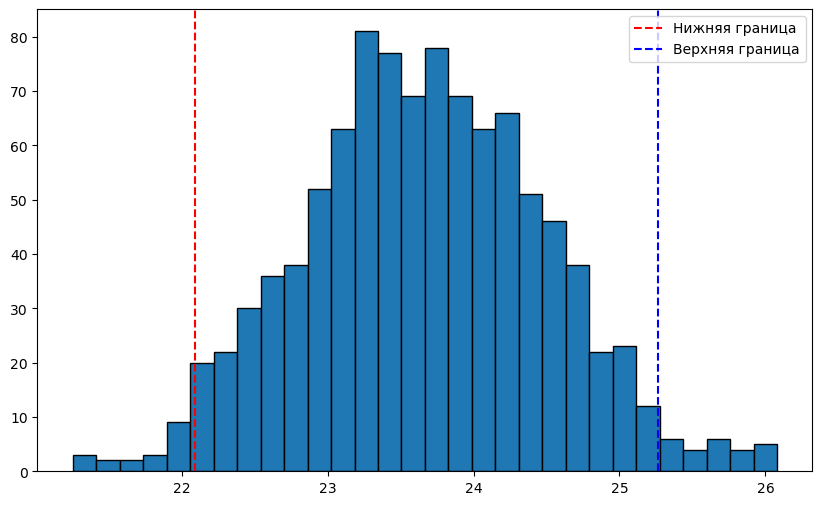

Доверительный интервал: 
Нижняя граница: 22.09
Верхняя граница: 25.26


None


In [185]:
def bootstrap_conf_ints(sample: list, alpha: float):
    n_bootstrap=1000
    pupupu=[]
    for i in range(n_bootstrap):
        sample1 = np.random.choice(sample, size=len(sample), replace=True)
        pupupu.append(np.mean(sample1))

    ci_lower = np.percentile(pupupu, 2.5)
    ci_upper = np.percentile(pupupu, 97.5)


    plt.figure(figsize=(10, 6))
    plt.hist(pupupu, bins=30, edgecolor='black')
    plt.axvline(ci_lower, color='red', linestyle='--', label='Нижняя граница')
    plt.axvline(ci_upper, color='blue', linestyle='--', label='Верхняя граница')
    plt.legend()
    plt.show()

    print(f"Доверительный интервал: \nНижняя граница: {ci_lower:.2f}\nВерхняя граница: {ci_upper:.2f}\n\n")

print(bootstrap_conf_ints(sample, alpha))

### Задание № 5 

Допустим, вы думаете, что $25\%$ студентов вашего университета ни разу не пропустили ни одной лекции. В выборочном опросе из $75$ случайных студентов таких оказалось $15$ человек. Проверьте свою гипотезу на уровне значимости $\alpha = 0.02$ против двусторонних альтернатив. В ответ запишите достигаемый уровень значимости с точностью до четвертого знака.

❓Каким критерием можно проверить эту гипотезу и почему?

> ответ тут

In [186]:
def proportion_test(p_hat, p_0, n, alpha):
    se = np.sqrt(p_0 * (1 - p_0) / n)
    z_stat = (p_hat - p_0) / se
    p_value = 2 * (1 - st.norm.cdf(abs(z_stat)))
    print(f"Z-статистика: {z_stat:.4f}, p-value: {p_value:.4f}, se: {se:.4f}, alpha: {alpha}\n")
    if p_value < alpha:
        print(f"На уровне значимости {alpha} отвергаем нулевую гипотезу т.к. p-value < alpha")
    else:
        print(f"На уровне значимости {alpha} не отвергаем нулевую гипотезу т.к. p-value > alpha")
    return z_stat, p_value

print(proportion_test(0.2, 0.25, 75, 0.02))

p_hat = 15
p_0 = 0.25
n = 75
alpha = 0.02


Z-статистика: -1.0000, p-value: 0.3173, se: 0.0500, alpha: 0.02

На уровне значимости 0.02 не отвергаем нулевую гипотезу т.к. p-value > alpha
(np.float64(-0.9999999999999998), np.float64(0.31731050786291415))


### Задание № 6

Допустим мы предполагаем, что стандартное отклонение в стобалльном рейтинге студентов равно $15$. И решаем проверить это, оценив рейтинг знакомых. Получилась выборка объема $n = 20$, у
которой выборочное стандартное отклонение равно $14$.  
Уровень значимости возьмём $\alpha = 0.1$, а альтернативы рассмотрим двусторонние. Используй для этого соответствующий критерий из `scipy`. 

In [187]:
s = 14
sigma0 = 15
n = 20
alpha = 0.1


#найдем дисперсию
s_2 = (s - sigma0)**2 / (n - 1)
print(f"дисперсия: {s_2:.4f}")
# Рассчитываем хи-квадрат статистику
chi_sq_stat = (n - 1) * s_2 / sigma0**2

chi_sq_stat_lower = chi_sq_stat - st.chi2.ppf(1 - alpha / 2, n - 1)
chi_sq_stat_upper = chi_sq_stat + st.chi2.ppf(1 - alpha / 2, n - 1)

# Вычисляем p-value для двустороннего теста
p_value = st.chi2(df=n-1).sf(chi_sq_stat) * 2
if p_value > 1:
    p_value = 2 - p_value

if p_value < alpha:
    print(f"На уровне значимости {alpha} отвергаем нулевую гипотезу т.к. p-value < alpha")
else:
    print(f"На уровне значимости {alpha} не отвергаем нулевую гипотезу т.к. p-value > alpha")

print(f"chi_sq_stat: {chi_sq_stat:.4f}, chi_sq_stat_lower: {chi_sq_stat_lower:.4f}, chi_sq_stat_upper: {chi_sq_stat_upper:.4f}, p_value: {p_value:.4f}")


дисперсия: 0.0526
На уровне значимости 0.1 отвергаем нулевую гипотезу т.к. p-value < alpha
chi_sq_stat: 0.0044, chi_sq_stat_lower: -30.1391, chi_sq_stat_upper: 30.1480, p_value: 0.0000


In [188]:
from scipy import stats

# Исходные данные
sigma0 = 15
s = 14
n = 20
alpha = 0.1

# Рассчитываем хи-квадрат статистику
chi2_stat = (n - 1) * s**2 / sigma0**2

# Вычисляем p-value для двустороннего теста
p_value = 2 * min(stats.chi2(df=n-1).cdf(chi2_stat),
                 1 - stats.chi2(df=n-1).cdf(chi2_stat))

# Альтернативный способ вычисления p-value
p_value = stats.chi2(df=n-1).sf(chi2_stat) * 2
if p_value > 1:
    p_value = 2 - p_value

print(f"χ²-статистика = {chi2_stat:.3f}")
print(f"p-value = {p_value:.4f}")

# Принимаем решение
if p_value < alpha:
    print(f"При уровне значимости {alpha} ОТВЕРГАЕМ нулевую гипотезу")
else:
    print(f"При уровне значимости {alpha} НЕ ОТВЕРГАЕМ нулевую гипотезу")

print(f"Доверительный интервал: \nНижняя граница: {chi_sq_stat_lower:.4f}\nВерхняя граница: {chi_sq_stat_upper:.4f}")

χ²-статистика = 16.551
p-value = 0.7595
При уровне значимости 0.1 НЕ ОТВЕРГАЕМ нулевую гипотезу
Доверительный интервал: 
Нижняя граница: -30.1391
Верхняя граница: 30.1480


### Задание № 7

Пусть для выборки объема $n = 25$ вычислено среднее  $\bar{x} = 130$. Из предыдущих исследований известно стандартное отклонение $\sigma = 12$. Постройте $98\%$ доверительный интервал для среднего значения.

In [9]:
n = 25
mean_x = 130
s = 12
alpha = 0.98
# Рассчитываем доверительный интервал
st.norm.interval(loc = mean_x, scale = s/ np.sqrt(n), confidence=0.98)

(np.float64(124.41676510230198), np.float64(135.58323489769802))

### Задание № 8

Реализуй класс, позволяющий проводить проверку гипотезу о средних для двух выборок. 
1. В конструктор класса передаются две выборки
2. В методе `compute_stat` вычисляется `t` или `z` статистика (соответственно, дисперсия либо вычисляется, либо передается как параметр)
3. В методе `test` проводится тестирование, метод возвращает значение статистики, p_value и результат проверки
4. Выбирается альтернатива: двухсторонняя, правая или левая
5. Уровень значимости по умолчанию равен $0.05$ (может быть переназначен пользователем)
6. Добавь метод, позволяющий вычислять доверительные интервалы для средних для обеих выборок

In [190]:
class StatTester():
    def __init__(self, sample1, sample2):
        self.sample1 = sample1
        self.sample2 = sample2
        # код

    def compute_stat(self, ...):
        # код

    def test(self, ...):
        # код
        return

    def compute_conf_ints(self, ...):
        # код


SyntaxError: invalid syntax (1451491073.py, line 7)

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "hypothesis tasks completed"`
4. Выполни команду `git push`